In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('data.csv')

# Supression des plantes saines 

data.dropna(inplace = True)
data = data.reset_index(drop=True)

In [2]:
display(data.head())
display(data.info())
display(len(data.espece.unique()),' espèces : ', data.espece.unique())
display(len(data.nom_maladie.unique()), ' maladies : ', data.nom_maladie.unique())

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48001 entries, 0 to 48000
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   img_path     48001 non-null  object
 1   espece       48001 non-null  object
 2   malade       48001 non-null  bool  
 3   nom_maladie  48001 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.1+ MB


None

11

' espèces : '

array(['Apple', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape',
       'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Squash',
       'Strawberry', 'Tomato'], dtype=object)

20

' maladies : '

array(['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'Powdery_mildew',
       'Cercospora_leaf_spot Gray_leaf_spot', 'Common_rust_',
       'Northern_Leaf_Blight', 'Esca_(Black_Measles)',
       'Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Haunglongbing_(Citrus_greening)', 'Bacterial_spot',
       'Early_blight', 'Late_blight', 'Leaf_scorch', 'Leaf_Mold',
       'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
       'Target_Spot', 'Tomato_mosaic_virus',
       'Tomato_Yellow_Leaf_Curl_Virus'], dtype=object)

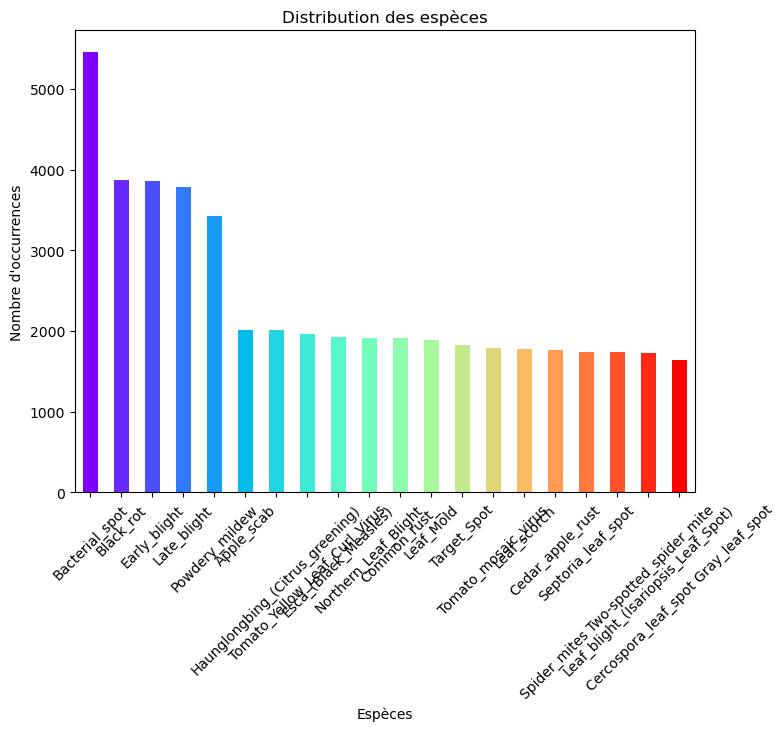

In [3]:
counts = data['nom_maladie'].value_counts()

num_colors = len(counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color = colors)
plt.title("Distribution des espèces")
plt.xlabel("Espèces")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

## Classification par RandomForest

In [4]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Fonction qui extrait l'histogramme des images 

def extract_features(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

X = []
y = []

for img_path, label in zip(data['img_path'], data['nom_maladie']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [5]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciation du Random Forest
rf = RandomForestClassifier(random_state=42)

In [6]:
# Recherche des paramètres optimaux pour le Random Forest avec SearchCridCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 250],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy',verbose=40)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.933 total time=   2.3s
[CV 2/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.931 total time=   2.1s
[CV 3/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.929 total time=   2.1s
[CV 4/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.932 total time=   2.1s
[CV 5/5; 1/36] START max_features=auto, min_samples_leaf=1, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 1/36] END max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.932 total time=   2.1s
[CV 1/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.961 total time=  10.8s
[CV 2/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.965 total time=  10.5s
[CV 3/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.959 total time=  10.5s
[CV 4/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.964 total time=  10.6s
[CV 5/5; 2/36] START max_features=auto, min_samples_leaf=1, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 2/36] END max_features=auto, min_samples_leaf=1, n_estimators=50;, score=0.962 total time=  10.7s
[CV 1/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.966 total time=  21.2s
[CV 2/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.970 total time=  21.2s
[CV 3/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.964 total time=  21.3s
[CV 4/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.968 total time=  21.2s
[CV 5/5; 3/36] START max_features=auto, min_samples_leaf=1, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 3/36] END max_features=auto, min_samples_leaf=1, n_estimators=100;, score=0.963 total time=  21.3s
[CV 1/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.968 total time=  53.2s
[CV 2/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.970 total time=  53.4s
[CV 3/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.967 total time=  53.3s
[CV 4/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.968 total time=  53.0s
[CV 5/5; 4/36] START max_features=auto, min_samples_leaf=1, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 4/36] END max_features=auto, min_samples_leaf=1, n_estimators=250;, score=0.966 total time=  52.9s
[CV 1/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.927 total time=   2.0s
[CV 2/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.926 total time=   1.9s
[CV 3/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.923 total time=   2.0s
[CV 4/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.926 total time=   2.6s
[CV 5/5; 5/36] START max_features=auto, min_samples_leaf=3, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 5/36] END max_features=auto, min_samples_leaf=3, n_estimators=10;, score=0.925 total time=   2.1s
[CV 1/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.955 total time=   9.9s
[CV 2/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.956 total time=   9.9s
[CV 3/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.952 total time=   9.9s
[CV 4/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.957 total time=  10.3s
[CV 5/5; 6/36] START max_features=auto, min_samples_leaf=3, n_estimators=50.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 6/36] END max_features=auto, min_samples_leaf=3, n_estimators=50;, score=0.952 total time=   9.9s
[CV 1/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.957 total time=  19.9s
[CV 2/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.958 total time=  19.8s
[CV 3/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.956 total time=  19.9s
[CV 4/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.958 total time=  20.0s
[CV 5/5; 7/36] START max_features=auto, min_samples_leaf=3, n_estimators=100....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 7/36] END max_features=auto, min_samples_leaf=3, n_estimators=100;, score=0.956 total time=  19.9s
[CV 1/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.961 total time=  49.9s
[CV 2/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.961 total time=  50.0s
[CV 3/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.959 total time=  51.3s
[CV 4/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.959 total time=  49.7s
[CV 5/5; 8/36] START max_features=auto, min_samples_leaf=3, n_estimators=250....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 8/36] END max_features=auto, min_samples_leaf=3, n_estimators=250;, score=0.960 total time=  49.9s
[CV 1/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.916 total time=   1.9s
[CV 2/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.912 total time=   1.9s
[CV 3/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.912 total time=   2.0s
[CV 4/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.911 total time=   2.1s
[CV 5/5; 9/36] START max_features=auto, min_samples_leaf=5, n_estimators=10.....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 9/36] END max_features=auto, min_samples_leaf=5, n_estimators=10;, score=0.912 total time=   2.0s
[CV 1/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.947 total time=   9.7s
[CV 2/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.947 total time=   9.7s
[CV 3/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.943 total time=   9.3s
[CV 4/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.945 total time=   9.6s
[CV 5/5; 10/36] START max_features=auto, min_samples_leaf=5, n_estimators=50....


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 10/36] END max_features=auto, min_samples_leaf=5, n_estimators=50;, score=0.943 total time=   9.5s
[CV 1/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.949 total time=  19.2s
[CV 2/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.953 total time=  19.2s
[CV 3/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.946 total time=  19.1s
[CV 4/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.946 total time=  19.2s
[CV 5/5; 11/36] START max_features=auto, min_samples_leaf=5, n_estimators=100...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 11/36] END max_features=auto, min_samples_leaf=5, n_estimators=100;, score=0.947 total time=  19.2s
[CV 1/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.952 total time=  47.6s
[CV 2/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.955 total time=  48.0s
[CV 3/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.949 total time=  47.7s
[CV 4/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.951 total time=  47.7s
[CV 5/5; 12/36] START max_features=auto, min_samples_leaf=5, n_estimators=250...


C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5; 12/36] END max_features=auto, min_samples_leaf=5, n_estimators=250;, score=0.952 total time=  47.7s
[CV 1/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 1/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.933 total time=   2.1s
[CV 2/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 2/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.931 total time=   2.1s
[CV 3/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 3/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.929 total time=   2.1s
[CV 4/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 4/5; 13/36] END max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.932 total time=   2.1s
[CV 5/5; 13/36] START max_features=sqrt, min_samples_leaf=1, n_estimators=10....
[CV 5/5; 13/36] END max_features=sqrt, min_samples_lea

[CV 4/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.911 total time=   1.9s
[CV 5/5; 21/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=10....
[CV 5/5; 21/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=10;, score=0.912 total time=   1.9s
[CV 1/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 1/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.947 total time=   9.5s
[CV 2/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 2/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.947 total time=   9.4s
[CV 3/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 3/5; 22/36] END max_features=sqrt, min_samples_leaf=5, n_estimators=50;, score=0.943 total time=   9.6s
[CV 4/5; 22/36] START max_features=sqrt, min_samples_leaf=5, n_estimators=50....
[CV 4/5; 22/36] END max_features=sqrt, min_samples_leaf

[CV 3/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.933 total time=   4.8s
[CV 4/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 4/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.934 total time=   4.6s
[CV 5/5; 30/36] START max_features=log2, min_samples_leaf=3, n_estimators=50....
[CV 5/5; 30/36] END max_features=log2, min_samples_leaf=3, n_estimators=50;, score=0.933 total time=   4.7s
[CV 1/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 1/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.940 total time=   9.4s
[CV 2/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 2/5; 31/36] END max_features=log2, min_samples_leaf=3, n_estimators=100;, score=0.942 total time=   9.4s
[CV 3/5; 31/36] START max_features=log2, min_samples_leaf=3, n_estimators=100...
[CV 3/5; 31/36] END max_features=log2, min_samples_le

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [7]:
print("Meilleurs hyperparamètres :")
for param, value in best_params.items():
    print(f"{param}: {value}")

Meilleurs hyperparamètres :
max_features: auto
min_samples_leaf: 1
n_estimators: 250


In [8]:
# Entraînement du modèle

rf_model = grid_search.best_estimator_

rf_model.fit(X_train, y_train)

# Évaluation du modèle
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

C:\Users\aissa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy: 0.9771898760545776


In [9]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

                                      precision    recall  f1-score   support

                          Apple_scab       1.00      0.99      0.99       407
                      Bacterial_spot       0.97      0.96      0.97      1087
                           Black_rot       0.98      0.99      0.99       780
                    Cedar_apple_rust       0.99      1.00      1.00       351
 Cercospora_leaf_spot Gray_leaf_spot       0.98      0.97      0.98       319
                        Common_rust_       1.00      0.99      1.00       368
                        Early_blight       0.97      0.98      0.98       794
                Esca_(Black_Measles)       1.00      0.98      0.99       388
     Haunglongbing_(Citrus_greening)       0.96      0.94      0.95       398
                         Late_blight       0.95      0.97      0.96       745
                           Leaf_Mold       0.99      0.99      0.99       370
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.97      0.98      

## Matrice de confusion

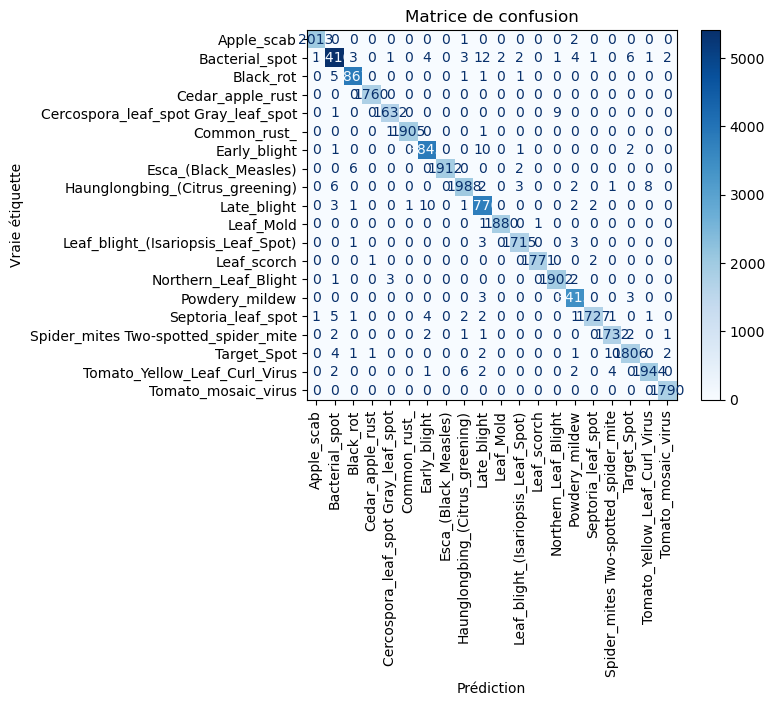

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model.predict(X)

# Calcul de la matrice de confusion
cm = confusion_matrix(y, y_pred)

labels = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

plt.title('Matrice de confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vraie étiquette')
plt.show()

In [11]:
import joblib

joblib.dump(rf_model, 'rf_model_nom_maladie.pkl')

['rf_model_nom_maladie.pkl']

# Démonstration

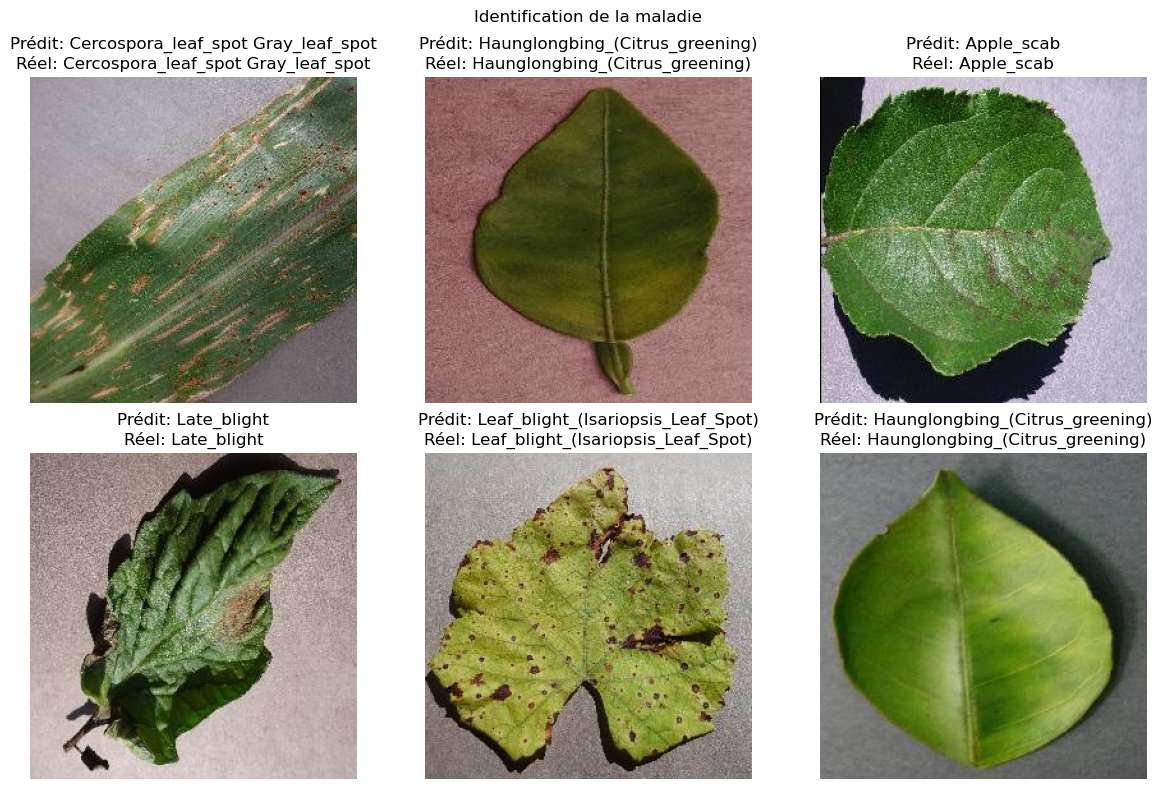

In [12]:
import random

random_indices = random.sample(range(len(data)), 6)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Identification de la maladie')

for i, idx in enumerate(random_indices):
    img_path = data['img_path'][idx]
    img = cv2.imread(img_path)

    img_features = extract_features(img)

    predicted_label = rf_model.predict([img_features])[0]

    true_label = data['nom_maladie'][idx]

    row = i // 3
    col = i % 3
    axes[row, col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f"Prédit: {predicted_label}\nRéel: {true_label}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Performances du modèle sur les données de test

In [13]:
data_test = pd.read_csv('data_test.csv')

data_test

,img_path,espece,malade,nom_maladie
0,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
1,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
2,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
3,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
4,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Apple,True,Apple_scab
...,...,...,...,...
17567,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
17568,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
17569,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus
17570,C:\Users\aissa\Desktop\Projet\Exploration\new_...,Tomato,True,Tomato_Yellow_Leaf_Curl_Virus


In [14]:
X_test = []
y_test = []

for img_path, label in zip(data_test['img_path'], data_test['nom_maladie']):
    img = cv2.imread(img_path)
    features = extract_features(img)  
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
accuracy = rf_model.score(X_test, y_test)

accuracy

0.6653767357159117